# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from functools import reduce


In [37]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are montlhy reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *monthly average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

# Guinea
We begin our analysis importing all the files from a single country (Guinea) and we start to process this data. In fact, each of the three countries has a different format and we want to unify it.

In [38]:
path_guinea = DATA_FOLDER + "ebola/guinea_data/"
files = glob.glob(path_guinea + '*.csv')
df_guinea = [pd.read_csv(f) for f in files]
df_guinea

[          Date                                        Description  Totals  \
 0   2014-08-04                              New cases of suspects       5   
 1   2014-08-04                             New cases of probables       0   
 2   2014-08-04                             New cases of confirmed       4   
 3   2014-08-04                  Total new cases registered so far       9   
 4   2014-08-04                            Total cases of suspects      11   
 5   2014-08-04                           Total cases of probables     133   
 6   2014-08-04                           Total cases of confirmed     351   
 7   2014-08-04       Cumulative (confirmed + probable + suspects)     495   
 8   2014-08-04                        New deaths registered today       2   
 9   2014-08-04            New deaths registered today (confirmed)       2   
 10  2014-08-04            New deaths registered today (probables)       0   
 11  2014-08-04             New deaths registered today (suspect

In order to exclude redundant information, we decided to remove the data about the single cities and to keep only the "Totals". This choice additionally simplifies our analysis since each file contains a different set of cities. 
Before excluding this data we sum up each row of the first file (the data corresponding to the different cities), in order to check whether the information in "Totals" is correct or not. 

In [40]:
df_guinea[0]['sum'] = df_guinea[0].ix[:,3:].sum(axis=1) 

df_guinea[0]['Diff_tot'] = df_guinea[0]['Totals']-df_guinea[0]['sum']
df_guinea[0]['Diff_tot'][df_guinea[0]['Diff_tot'] != 0]

0       -5.0
2       -4.0
3       -9.0
4      -11.0
5     -133.0
6     -351.0
7     -495.0
8       -2.0
9       -2.0
12      -2.0
13    -133.0
14    -228.0
15    -363.0
16     -31.0
17     -18.0
19     -13.0
20    -139.0
21     -89.0
22    -161.0
23    -190.0
24     -52.0
25     -81.0
26      -7.0
27      -6.0
28    -220.0
29    -277.0
30     -23.0
31     -12.0
32      -8.0
33      -8.0
34      -2.0
36   -6376.0
37    -864.0
38   -5513.0
39    -772.0
Name: Diff_tot, dtype: float64

In [41]:
df_guinea[0][df_guinea[0]['Diff_tot'] != 0].ix[40:41,:]


,Date,Description,Totals,Conakry,Gueckedou,Macenta,Dabola,Kissidougou,Dinguiraye,Telimele,Boffa,Kouroussa,Dubreka,Siguiri,Pita,Nzerekore,sum,Diff_tot


The results above show that in different cases there is no correspondence between our sum and the provided "Totals".
In particular, in the last two cases we see a significant difference due to the fact that the last two rows only contains NaN values. Given this unavailable information, we decided to relay on the provided "Totals" and  exclude the other columns from the analysis.

In [42]:
df_guinea = [df.ix[:,:3] for df in df_guinea]
df_guinea[8].head()

,Date,Description,Totals
0,2014-09-08,New cases of suspects,5
1,2014-09-08,New cases of probables,0
2,2014-09-08,New cases of confirmed,11
3,2014-09-08,Total new cases registered so far,16
4,2014-09-08,Total cases of suspects,32


Now that we have cleaned our Guinea data, we can concatenate the different files. 

In [43]:
df_guinea_all = reduce(lambda x, y: pd.concat([x,y]), df_guinea)
df_guinea_all.head()

,Date,Description,Totals
0,2014-08-04,New cases of suspects,5
1,2014-08-04,New cases of probables,0
2,2014-08-04,New cases of confirmed,4
3,2014-08-04,Total new cases registered so far,9
4,2014-08-04,Total cases of suspects,11


We drop eventual NaNs:

In [44]:
df_guinea_all = df_guinea_all.dropna()

We add a label that indicates the country of origin of this data, that will be useful to create a single dataframe.

In [45]:
df_guinea_all['Country'] = 'Guinea'
df_guinea_all.head()

,Date,Description,Totals,Country
0,2014-08-04,New cases of suspects,5,Guinea
1,2014-08-04,New cases of probables,0,Guinea
2,2014-08-04,New cases of confirmed,4,Guinea
3,2014-08-04,Total new cases registered so far,9,Guinea
4,2014-08-04,Total cases of suspects,11,Guinea


To facilitate our research we can filter the data. We are interested in the "Total new cases registered so far" (which is the sum of new cases of confirmed, probables and suspects in each day) and "New deaths registered":

In [10]:
df_all_filtered = df_guinea_all[df_guinea_all['Description'].str.contains("New deaths registered", na=False)]
print(df_all_filtered.shape)
df_all_filtered.head()

(46, 4)


,Date,Description,Totals,Country
8,2014-08-04,New deaths registered today,2,Guinea
9,2014-08-04,New deaths registered today (confirmed),2,Guinea
10,2014-08-04,New deaths registered today (probables),0,Guinea
11,2014-08-04,New deaths registered today (suspects),0,Guinea
9,2014-08-26,New deaths registered,5,Guinea


We can notice that some descriptions are different in some files. To understand which descriptions are common to all the dataframes, we can count how many times each description is present and sort them out:

In [11]:
df_all_count = df_all_filtered.groupby(['Description'], as_index = False)['Totals'].count().sort_values(by='Totals', ascending=False)
df_all_count

,Description,Totals
0,New deaths registered,21
1,New deaths registered among health workers,21
2,New deaths registered today,1
3,New deaths registered today (confirmed),1
4,New deaths registered today (probables),1
5,New deaths registered today (suspects),1


We can immediately see that the description "New deaths registered" has been used in 21 out of 22 files. The last three have been instead described as "New deaths registered today". We can correct this "mistake" and finally filter the two groups we are interested in: 

In [12]:
df_guinea_all['Description'].replace("New deaths registered today", "New deaths registered", inplace=True)


In [13]:
df_all_deaths = df_guinea_all[df_guinea_all['Description'] == "New deaths registered"] 
df_all_cases = df_guinea_all[df_guinea_all['Description'] == "Total new cases registered so far"]
df_guinea_all = pd.concat([df_all_deaths, df_all_cases], axis=0)
df_guinea_all.head()

,Date,Description,Totals,Country
8,2014-08-04,New deaths registered,2,Guinea
9,2014-08-26,New deaths registered,5,Guinea
9,2014-08-27,New deaths registered,2,Guinea
9,2014-08-30,New deaths registered,5,Guinea
9,2014-08-31,New deaths registered,3,Guinea


At this point we want to group the samples by country and month of the year. First, we sum up the "Totals" that belong to the same month.

In [14]:
df_guinea_all['Date'] = df_guinea_all['Date'].apply(lambda x: x[:-3])
df_guinea_all.head()

,Date,Description,Totals,Country
8,2014-08,New deaths registered,2,Guinea
9,2014-08,New deaths registered,5,Guinea
9,2014-08,New deaths registered,2,Guinea
9,2014-08,New deaths registered,5,Guinea
9,2014-08,New deaths registered,3,Guinea


We give to the descriptions new names:

In [15]:
df_guinea_all['Description'].replace("New deaths registered", "New deaths", inplace=True)
df_guinea_all['Description'].replace("Total new cases registered so far", "New cases", inplace=True)


The next objective is to transform the "Totals" data into numeric values, we sum them by each month and finally compute the mean.

In [16]:
df_guinea_all['Totals'] = df_guinea_all['Totals'].apply(pd.to_numeric, errors='coerce')

In [17]:
df_guinea_all = df_guinea_all.groupby(['Date','Description', 'Country'], as_index = False)['Totals'].sum()
df_guinea_all

,Date,Description,Country,Totals
0,2014-08,New cases,Guinea,129
1,2014-08,New deaths,Guinea,17
2,2014-09,New cases,Guinea,314
3,2014-09,New deaths,Guinea,57
4,2014-10,New cases,Guinea,34
5,2014-10,New deaths,Guinea,15


In [18]:
df_guinea_all = df_guinea_all.groupby(['Country','Description'], as_index = False)['Totals'].mean()
print(df_guinea_all.shape)
df_guinea_all.head()

(2, 3)


,Country,Description,Totals
0,Guinea,New cases,159.000000
1,Guinea,New deaths,29.666667


# Liberia

At this point, we repeat the same procedure for the other 2 countries, being careful to treat the data properly, since each dataset has different descriptions and labels.

In [19]:
path_liberia = DATA_FOLDER + "ebola/liberia_data/"
files = glob.glob(path_liberia + '*.csv')
df_liberia = [pd.read_csv(f) for f in files]
df_liberia = [df.ix[:,:3] for df in df_liberia]
df_liberia_all = reduce(lambda x, y: pd.concat([x,y]), df_liberia)
df_liberia_all = df_liberia_all.rename(columns={'Variable': 'Description', 'National': 'Totals'})
df_liberia_all['Country'] = 'Liberia'
df_liberia_all = df_liberia_all.dropna()
#add a 0 to the month when not present
df_liberia_all['Date'] = df_liberia_all['Date'].apply(lambda x: "0"+x if x[1]=='/' in str(x) else str(x))
#add a 0 to the day when not present
df_liberia_all['Date'] = df_liberia_all['Date'].apply(lambda x: x[:2]+"0"+x[3:] if x[2]=='/' in str(x) else str(x)) 
 #add "20" to the year
df_liberia_all['Date'] = df_liberia_all['Date'].apply(lambda x: x[:5]+'20'+x[-2:] if x[-3]=='/' in str(x) else str(x))
#remove day info
df_liberia_all['Date'] = df_liberia_all['Date'].apply(lambda x: x[:2]+"/"+x[-4:]) 

df_liberia_all.head()

,Date,Description,Totals,Country
0,06/2014,Specimens collected,1.0,Liberia
1,06/2014,Specimens pending for testing,0.0,Liberia
2,06/2014,Total specimens tested,28.0,Liberia
3,06/2014,Newly reported deaths,2.0,Liberia
4,06/2014,Total death/s in confirmed cases,8.0,Liberia


In [20]:
df_liberia_all[df_liberia_all['Description'].str.contains("New Case/s", na=False)  ] 

,Date,Description,Totals,Country
23,06/2014,New Case/s (Suspected),2.0,Liberia
24,06/2014,New Case/s (Probable),1.0,Liberia
23,06/2014,New Case/s (Suspected),2.0,Liberia
24,06/2014,New Case/s (Probable),0.0,Liberia
23,06/2014,New Case/s (Suspected),5.0,Liberia
24,06/2014,New Case/s (Probable),0.0,Liberia
23,06/2014,New Case/s (Suspected),2.0,Liberia
24,06/2014,New Case/s (Probable),0.0,Liberia
23,06/2014,New Case/s (Suspected),4.0,Liberia
24,06/2014,New Case/s (Probable),1.0,Liberia


In [21]:
df_all_deaths = df_liberia_all[df_liberia_all['Description'] == "Newly reported deaths"  ] 
df_all_cases = df_liberia_all[df_liberia_all['Description'].str.contains("New Case/s", na=False)  ] 

df_liberia_all = pd.concat([df_all_deaths, df_all_cases], axis=0)

df_liberia_all['Description'].replace("New Case/s (Suspected)", "New cases", inplace=True)
df_liberia_all['Description'].replace("New Case/s (Probable)", "New cases", inplace=True)
df_liberia_all['Description'].replace("New Case/s (confirmed)", "New cases", inplace=True)
df_liberia_all['Description'].replace("Newly reported deaths", "New deaths", inplace=True)


df_liberia_all.head()

,Date,Description,Totals,Country
3,06/2014,New deaths,2.0,Liberia
3,06/2014,New deaths,0.0,Liberia
3,06/2014,New deaths,4.0,Liberia
3,06/2014,New deaths,4.0,Liberia
3,06/2014,New deaths,3.0,Liberia


In [22]:
df_liberia_all = df_liberia_all.groupby(['Date','Description', 'Country'], as_index = False)['Totals'].sum()
df_liberia_all.head()

,Date,Description,Country,Totals
0,06/2014,New cases,Liberia,25.0
1,06/2014,New deaths,Liberia,14.0
2,07/2014,New cases,Liberia,74.0
3,07/2014,New deaths,Liberia,47.0
4,08/2014,New cases,Liberia,286.0


In [23]:
df_liberia_all = df_liberia_all.groupby(['Country','Description'], as_index = False)['Totals'].mean()
print(df_liberia_all.shape)
df_liberia_all.head()

(2, 3)


,Country,Description,Totals
0,Liberia,New cases,4640.571429
1,Liberia,New deaths,339.666667


In [24]:
#from datetime import datetime
#df_liberia_all['Date'] = df_liberia_all['Date'].apply(lambda x: "0"+x if x[1]=='/' in str(x) else str(x))
#df_liberia_all['Date'] =  df_liberia_all['Date'].apply(lambda x: datetime.strptime( x , '%m/%d/%Y'))
#df_liberia_all['Date'] =  df_liberia_all['Date'].apply(lambda x: datetime.strptime('%Y-%m-%d'))


# Sierra Leone

In [25]:
path_sl = DATA_FOLDER + "ebola/sl_data/"
files = glob.glob(path_sl + '*.csv')
df_sl = [pd.read_csv(f) for f in files]
df_sl_all = reduce(lambda x, y: pd.concat([x,y]), df_sl)
df_sl_all = pd.concat([df_sl_all.date, df_sl_all.variable, df_sl_all.National], axis=1)
df_sl_all = df_sl_all.rename(columns={'date': 'Date', 'variable': 'Description', 'National': 'Totals'})
df_sl_all['Country'] = 'Sierra Leone'
df_sl_all = df_sl_all.dropna()

df_sl_all.head()


,Date,Description,Totals,Country
0,2014-08-12,population,6348350,Sierra Leone
1,2014-08-12,new_noncase,4,Sierra Leone
2,2014-08-12,new_suspected,10,Sierra Leone
3,2014-08-12,new_probable,1,Sierra Leone
4,2014-08-12,new_confirmed,11,Sierra Leone


In [26]:
df_all_cases1 = df_sl_all[df_sl_all['Description'] == "new_suspected"  ]
df_all_cases2 = df_sl_all[df_sl_all['Description'] == "new_probable"  ] 
df_all_cases3 = df_sl_all[df_sl_all['Description'] == "new_confirmed"  ] 

df_all_cases = pd.concat([df_all_cases1, df_all_cases2, df_all_cases3], axis=0)

df_all_deaths = df_sl_all[df_sl_all['Description'].str.contains("etc_new_deaths", na=False)  ] 

df_sl_all = pd.concat([df_all_deaths, df_all_cases], axis=0)

df_sl_all['Description'].replace("new_suspected", "New cases", inplace=True)
df_sl_all['Description'].replace("new_probable", "New cases", inplace=True)
df_sl_all['Description'].replace("new_confirmed", "New cases", inplace=True)
df_sl_all['Description'].replace("etc_new_deaths", "New deaths", inplace=True)


df_sl_all.head()

,Date,Description,Totals,Country
16,2014-09-16,New deaths,4,Sierra Leone
16,2014-09-19,New deaths,0,Sierra Leone
16,2014-09-28,New deaths,4,Sierra Leone
16,2014-10-01,New deaths,4,Sierra Leone
16,2014-10-03,New deaths,0,Sierra Leone


In [27]:
df_sl_all = df_sl_all.groupby(['Date','Description', 'Country'], as_index = False)['Totals'].sum()
df_sl_all.head()

,Date,Description,Country,Totals
0,2014-08-12,New cases,Sierra Leone,10111
1,2014-08-13,New cases,Sierra Leone,3115
2,2014-08-14,New cases,Sierra Leone,0213
3,2014-08-15,New cases,Sierra Leone,6110
4,2014-08-16,New cases,Sierra Leone,3018


In [28]:
df_sl_all['Totals'] = df_sl_all['Totals'].apply(pd.to_numeric, errors='coerce')
df_sl_all = df_sl_all.groupby(['Country','Description'], as_index = False)['Totals'].mean()
print(df_sl_all.shape)
df_sl_all.head()

(2, 3)


,Country,Description,Totals
0,Sierra Leone,New cases,10497.789474
1,Sierra Leone,New deaths,4.482759


# Concatenation 

In [29]:
df_all = pd.concat([df_guinea_all, df_sl_all, df_liberia_all ], axis=0)
df_all

,Country,Description,Totals
0,Guinea,New cases,159.000000
1,Guinea,New deaths,29.666667
0,Sierra Leone,New cases,10497.789474
1,Sierra Leone,New deaths,4.482759
0,Liberia,New cases,4640.571429
1,Liberia,New deaths,339.666667


In [30]:
df_all.set_index(['Country', 'Description'])

Totals
Country      Description              
Guinea       New cases      159.000000
             New deaths      29.666667
Sierra Leone New cases    10497.789474
             New deaths       4.482759
Liberia      New cases     4640.571429
             New deaths     339.666667

We can notice that in our results the new cases for "Sierra Leone" (in particular) and "Liberia" seem to be too many. It may be a natural spike in the reported cases of death or an error in the data.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

We first read the metadata and define barcodes.


In [31]:
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')
barcodes = metadata['BARCODE']

microbiomeData = pd.DataFrame()

We import each spreadsheet from the microbiome folder identified by the barcode to a single DataFrame.


In [32]:
for barcode in barcodes:
    
    spreadsheet = pd.read_excel(DATA_FOLDER+'/microbiome/' + str(barcode)+'.xls', header=None, names=['ORGANISM', 'VALUE'])
    # Add data from the metadata file as columns
    for meta in metadata.columns:
        spreadsheet[meta] = metadata[metadata.BARCODE == barcode][meta].item()
    
    # Replace NaN values by 'unknown'
    spreadsheet = spreadsheet.fillna('unknown')
    
    microbiomeData = pd.concat([microbiomeData,spreadsheet])

For the index we take the barcode and concatenate it to the last part of the organism identifier.


We check if the indices are unique.


In [33]:
indices = pd.Series([list(i)[0]+'_'+list(i)[1].split()[-1] for i in microbiomeData[['BARCODE','ORGANISM']].values])
microbiomeData.index = indices

if not microbiomeData.index.is_unique:
    raise Exception('Indices are not unique')
    

microbiomeData





,ORGANISM,VALUE,BARCODE,GROUP,SAMPLE
MID1_Ignisphaera,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,unknown
MID1_Pyrolobus,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
MID1_Stygiolobus,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
MID1_Thermofilum,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
MID1_Methanocella,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
MID1_Methanimicrococcus,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
MID1_Methermicoccus,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
MID1_Ferroglobus,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
MID1_Geoglobus,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
MID1_Haloplanus,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [34]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [35]:
# Write your answer here

# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = '/Users/sharbatc/Academia/Courses/Currently Learning/ada/ADA2017-Tutorials/02 - Intro to Pandas/Data'

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarking port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
filename = DATA_FOLDER+'/titanic.xls'
titanic = pd.read_excel(filename)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 


The types of each attribute are given below. It is meaningless to find out the range of attributes which are not numeric (`name`, `home.dest`) and hence we do not give the ranges of these attributes. 

In [5]:
typeframe = titanic.dtypes.to_frame()
typeframe.rename(columns = {0:'data type'})

,data type
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [6]:
titanic_max = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.max()).to_frame().rename(columns = {0:'max'})
titanic_min = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.min()).to_frame().rename(columns = {0:'min'})
titanic_range = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.max() - x.min()).to_frame().rename(columns = {0:'range'})

frames = [titanic_min, titanic_max, titanic_range]
pd.concat(frames,axis=1)

,min,max,range
pclass,1.0000,3.0000,2.0000
survived,0.0000,1.0000,1.0000
age,0.1667,80.0000,79.8333
sibsp,0.0000,8.0000,8.0000
parch,0.0000,9.0000,9.0000
fare,0.0000,512.3292,512.3292
body,1.0000,328.0000,327.0000


The `Categorical` attributes are `pclass`, `sex`, `survived`, `embarked`. We can choose `cabin` and `boat` as categories although there are too many elements in that category.

In [7]:
for col in ['pclass','sex','survived','embarked','cabin']:
    titanic[col] = titanic[col].astype('category') 

In [8]:
titanic.pclass.cat.categories = ['1st','2nd','3rd']
titanic.embarked.cat.categories = ['Cherbourg','Queenstown','Southampton']
titanic.survived.cat.categories = ['Perished','Survived']

In [9]:
typeframe = titanic.dtypes.to_frame()
typeframe.rename(columns = {0:'data type'})

,data type
pclass,category
survived,category
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,category


### 2. Plot histograms for the *travel class*, *embarking port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

Before we move forward, we see from the questions that there is no use for a lot of the data stored in our `DataFrame` and so we choose to drop them altogether. We do not use `HierarchicalIndex` to upload the data in the previous case.

In [10]:
titanic.drop(['name', 'sibsp','parch','ticket','fare','boat','body','home.dest'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,age,cabin,embarked
0,1st,Survived,female,29.0000,B5,Southampton
1,1st,Survived,male,0.9167,C22 C26,Southampton
2,1st,Perished,female,2.0000,C22 C26,Southampton
3,1st,Perished,male,30.0000,C22 C26,Southampton
4,1st,Perished,female,25.0000,C22 C26,Southampton


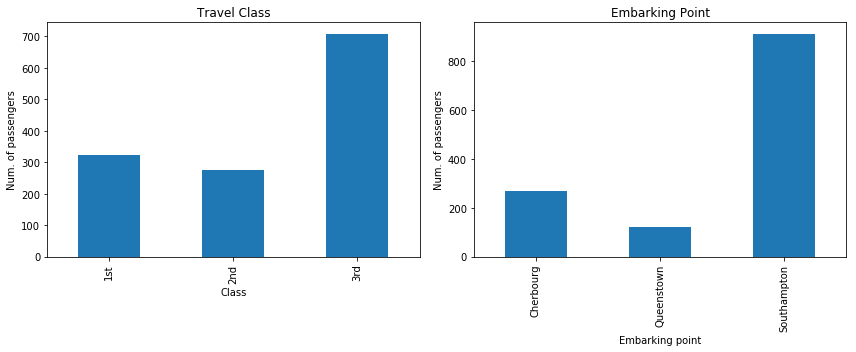

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

titanic['pclass'].value_counts(sort=False).plot(kind='bar', ax = axes[0], title = 'Travel Class')
axes[0].set_ylabel('Num. of passengers')
axes[0].set_xlabel('Class')

titanic['embarked'].dropna().value_counts(sort=False).plot(kind='bar', ax = axes[1], title = 'Embarking Point')
axes[1].set_ylabel('Num. of passengers')
axes[1].set_xlabel('Embarking point')
plt.tight_layout()

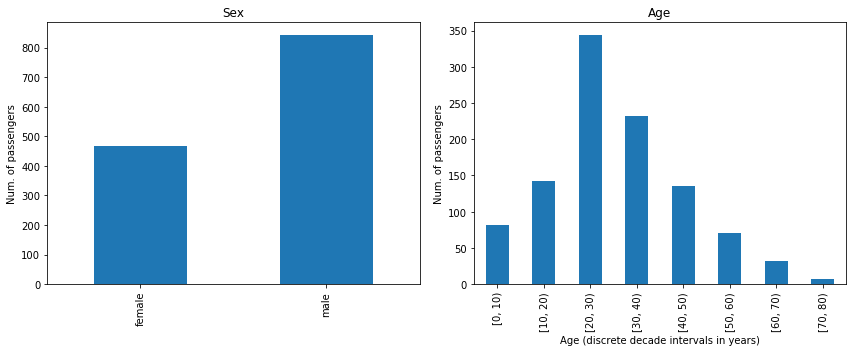

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

titanic['sex'].value_counts(sort=False).plot(kind='bar', ax = axes[0], title = 'Sex')
axes[0].set_ylabel('Num. of passengers')

step = 10 #decades
bin_range = np.arange(0, titanic['age'].max()+step, step)
out, bins  = pd.cut(titanic['age'].dropna(), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot(kind = 'bar', ax = axes[1], title = 'Age')
axes[1].set_xlabel('Age (discrete decade intervals in years)')
axes[1].set_ylabel('Num. of passengers')

plt.tight_layout()

### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

The labels of cabin numbers shown in the `titanic.html` file gives us an idea that there are some passengers (super rich people for sure) who booked more than one room. In all of the cases, they are on the same floor except for a few cases in which we have a spurious floor `F` in front of cabins on other floors. The floor id `F` is not even followed by a number. We thought of removing those and taking the other room which is followed by a number. 

We also removed the floor `T` which is a single entity, because although there does exist a *tank top*, it is not a deck as shown from the website below. (We are not responsible for the ads which pop up on it)

In [13]:
from IPython.display import IFrame

IFrame('https://www.encyclopedia-titanica.org/titanic-deckplans/tank-top.html', width=800, height=300)

In [14]:
titanic_cabin = titanic['cabin'].dropna().apply(lambda x: x[2:] if \
                                                (x.startswith("F ") or x.startswith("T"))\
                                                else str(x))

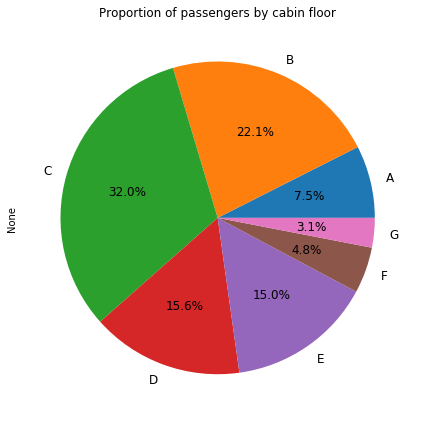

In [15]:
titanic_cabin.groupby([titanic_cabin.str[0]]).size().plot(kind = 'pie',\
                                                       title = 'Proportion of passengers by cabin floor',\
                                                       autopct='%1.1f%%', fontsize=12, figsize = (6,6))
plt.tight_layout()

### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

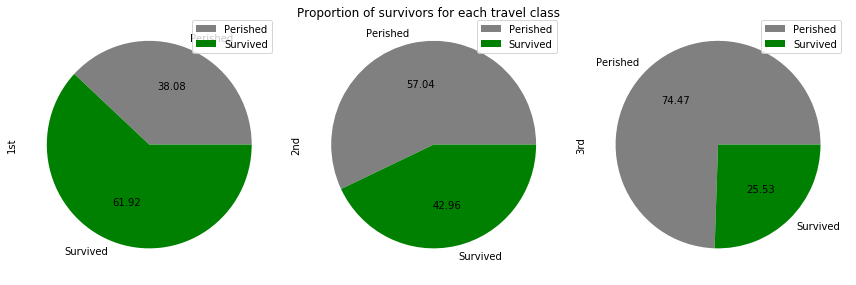

In [16]:
prop_survived = titanic.groupby(['survived','pclass']).size().unstack(fill_value=0)
prop_survived.plot(kind = 'pie',\
                   subplots = True,\
                   title = 'Proportion of survivors for each travel class',\
                   use_index = False,\
                   autopct='%.2f',\
                   colors = ['grey','green'],\
                   figsize=(12,4))

plt.tight_layout()

So, when it comes to class war, we do see that there is a larger proportion of surviving (61.92%) first class passengers, as compared to third class passengers (25.53%)

### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

None of the columns among `survived`, `pclass` or `sex` have any missing values. That's good news. 

In [17]:
def calc_prop_sur(df):
    perished, survived = df['survived'].value_counts()[0], df['survived'].value_counts()[1]
    return survived/(perished+survived)

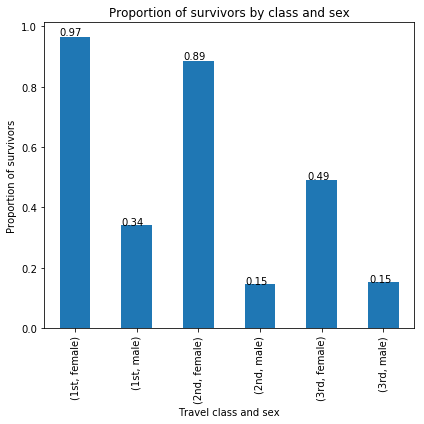

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

prop_survived_class = titanic.groupby(['pclass','sex']).apply(calc_prop_sur).plot(kind='bar', \
                                                            title = 'Proportion of survivors by class and sex')

for p in axes.patches:
    axes.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

axes.set_xlabel('Travel class and sex')
axes.set_ylabel('Proportion of survivors')
plt.tight_layout()

### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [19]:
med = titanic['age'].dropna().median()
titanic['age_gt_med'] = ((titanic['age'].dropna())>= med)
titanic['age_gt_med'] = titanic['age_gt_med'].astype('category') 
titanic.age_gt_med.cat.categories = ['Greater than {}'.format(med),'Less than {}'.format(med)]

In [20]:
prop_survived_class = titanic.groupby(['age_gt_med','pclass','sex']).apply(calc_prop_sur).\
                                                to_frame().rename(columns = {0:'proportion'})
prop_survived_class

proportion
age_gt_med        pclass sex               
Greater than 28.0 1st    female    0.950000
                         male      0.535714
                  2nd    female    0.901961
                         male      0.235294
                  3rd    female    0.528302
                         male      0.194313
Less than 28.0    1st    female    0.967742
                         male      0.308943
                  2nd    female    0.884615
                         male      0.077778
                  3rd    female    0.347826
                         male      0.130435

In [21]:
prop_survived_class.index.is_unique

True